In [94]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn_pandas import DataFrameMapper

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn2pmml.decoration import ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline
import 

from sklearn2pmml import sklearn2pmml

# CS422 - Laura Pereda

# Abstract

Within this project, I discovered a couple of things that changed my perspective of this field. First, the difference between feature selection and feature extraction. Apparently, feature selection keeps a subset of the original features while feature extraction creates new ones. I was under the assumption that PCA fell under feature selection, since it combined features. But there is a little more to it than just combining features, PCA uses the original features to create linear combinations and showcases them as new features. I'm glad I understood this a little better.

Second, the data preprocessing step is a lot of work. But it's very much necessary and efficient. I only knew and understood of a few ways to remove some features, but even then my model kept overfitting. That's one thing I wwant to change in the future. I want to discovery different techniques, understand, and utilize them correctly, so that I can create a decent model. 

# Overview

Just to clarify, I am by far no expert within this field so I do not expect some grand discovery from this project. I will give it my best shot to show that I at least understand the basic procedure by attempting to analyzing this given data.

### Problem Statement

In this case, the main objective of this project will be to demonstrate my ability to successfully use the following methods to analyze this data: clustering. I also hope to not produce a overfitting model. 

### Proposed Methodology

First, I like to understand the data a little bit better. I plan on plotting some features against each other to see if I can find anything interesting. If I find anything interesting, I'll probably do a little more digging into those features but I'm not sure how I will do so. After that, I'll probably do some PCA (find optimal #) & clustering (find optimal K). 

### Load the data

In [2]:
# Load the data into dataframe
df = pd.read_csv('data_public.csv')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,31.628960,-4.925617,29.828238,-5.572780,20.129709,7.072373,19.335662,27.283873,9.375416,15.336531,34.086952,-3.845316,-4.195369,18.972837,21.279968,3
1,-24.878420,-12.140354,-0.638120,6.712182,-18.044057,-12.485812,-5.060765,-23.392410,-9.336210,6.583095,-2.530664,-3.626419,-35.546821,-11.784902,-4.100635,2
2,-25.711262,-16.540789,7.450853,4.941910,-18.273375,-13.062138,-7.082651,-17.443779,-8.103270,8.345905,-1.319908,-1.234682,-33.845745,-6.827543,-5.758754,2
3,27.837458,-2.436980,29.479857,-3.360867,14.997228,10.254915,10.530714,27.082219,9.254091,26.860616,29.592860,-2.926678,-4.497271,15.949510,19.642792,3
4,30.520663,-5.017300,24.798154,-4.668743,19.697230,12.570798,13.141632,31.598069,12.120745,16.478925,25.257392,-2.133821,-4.365376,21.024188,18.976706,3


By using .describe(), I can find out more informatio about the data. I noticed that the min and max for each feature isn't that far apart. All the 15 features have a min within the negatives, and max in the positives, meaning they don't stray too far from one another. It's clear that our data is continous rather discrete.

In [3]:
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,-5.626123e-01,-7.432666e+00,1.069211e+01,-1.298888e+00,-1.715337e+00,-8.376662e+00,2.564679e+00,1.250097e+00,2.308441e+00,8.034096e+00,1.096927e+01,-2.569302e+00,-1.817342e+01,4.714102e+00,7.750275e+00,2.166636e+00
std,2.434552e+01,5.358689e+00,1.391955e+01,6.856531e+00,1.593805e+01,1.329916e+01,9.715908e+00,2.050294e+01,1.182328e+01,9.122371e+00,1.540449e+01,3.264653e+00,1.460082e+01,1.354750e+01,1.286000e+01,6.872945e-01
min,-3.658025e+01,-2.483024e+01,-1.329504e+01,-2.365417e+01,-2.703844e+01,-3.242560e+01,-1.782598e+01,-2.957892e+01,-1.628663e+01,-1.713628e+01,-1.550703e+01,-1.538548e+01,-3.959267e+01,-1.807380e+01,-1.410457e+01,1.000000e+00
25%,-2.190966e+01,-1.199548e+01,3.122246e-01,-5.221629e+00,-1.717748e+01,-1.847365e+01,-5.018479e+00,-1.814894e+01,-8.798066e+00,4.663393e+00,-3.789138e+00,-4.815882e+00,-3.253720e+01,-8.564706e+00,-4.916820e+00,2.000000e+00
50%,-6.043285e+00,-6.841852e+00,2.903836e+00,-2.683514e+00,1.938928e+00,-1.526870e+01,-1.500786e+00,1.556922e+00,1.570005e+00,8.908198e+00,1.042090e+01,-2.917836e+00,-1.345052e+01,7.400789e+00,1.184960e+01,2.000000e+00
75%,3.030517e+01,-3.649784e+00,2.778294e+01,4.777707e+00,1.581311e+01,7.629761e+00,1.298093e+01,2.473866e+01,1.152911e+01,1.475206e+01,2.639554e+01,-6.125631e-01,-4.138239e+00,1.794834e+01,2.048135e+01,3.000000e+00
max,4.609603e+01,1.506701e+01,4.475665e+01,1.402662e+01,2.707671e+01,2.489338e+01,3.268256e+01,4.075752e+01,3.083255e+01,3.400029e+01,4.772271e+01,1.223828e+01,1.163477e+01,3.286069e+01,3.183829e+01,3.000000e+00


## Data Processing & Analysis
To check for any missing values, I can utilize isnull.sum() as shown below. The results indiciates that there are no null values present within the dataframe, so we can proceed with the rest of the setup. That also means we don't need to use the impurt in the pipeline.

In [4]:
df.isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [5]:
# Create a dataframe with the data only
X = df.drop("Class", axis=1)
X.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,31.628960,-4.925617,29.828238,-5.572780,20.129709,7.072373,19.335662,27.283873,9.375416,15.336531,34.086952,-3.845316,-4.195369,18.972837,21.279968
1,-24.878420,-12.140354,-0.638120,6.712182,-18.044057,-12.485812,-5.060765,-23.392410,-9.336210,6.583095,-2.530664,-3.626419,-35.546821,-11.784902,-4.100635
2,-25.711262,-16.540789,7.450853,4.941910,-18.273375,-13.062138,-7.082651,-17.443779,-8.103270,8.345905,-1.319908,-1.234682,-33.845745,-6.827543,-5.758754
3,27.837458,-2.436980,29.479857,-3.360867,14.997228,10.254915,10.530714,27.082219,9.254091,26.860616,29.592860,-2.926678,-4.497271,15.949510,19.642792
4,30.520663,-5.017300,24.798154,-4.668743,19.697230,12.570798,13.141632,31.598069,12.120745,16.478925,25.257392,-2.133821,-4.365376,21.024188,18.976706


In [6]:
# Create a dataframe with the class only
y = pd.DataFrame(data=df["Class"], columns=['Class'])
y.head()

,Class
0,3
1,2
2,2
3,3
4,3


In [25]:
# Separate the data into training and testing phase
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5)

# I like to print out the shape so I have a visual on where the split was even though I know it's 80%:20%
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1199995, 15) (1199995, 1)
(5, 15) (5, 1)


In [54]:
# Lastly, I sync up the training data & the testing data
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
703460,-16.668633,-8.823453,2.559284,4.126992,-13.945149,-17.526316,-3.834420,-18.515908,-9.691521,6.135504,-7.204068,-2.378469,-30.444094,-6.354098,-3.075121,2
646156,35.821345,-3.333565,24.797855,-4.226158,17.127418,6.022154,12.771228,28.954804,10.755967,13.841780,27.385722,-0.907584,-7.366462,22.782409,23.729525,3
1010897,-1.743889,-4.241633,0.121739,-13.386470,6.531828,-12.814552,-1.459781,7.736287,19.077114,-8.284421,18.555958,2.611283,-0.996029,19.839560,19.919259,1
1092410,-29.000685,-7.261088,-1.133360,5.561130,-17.404403,-14.957096,-6.758390,-21.576426,-9.807917,7.727962,-2.456276,-3.211152,-31.373508,-6.321035,-4.296522,2
884807,-25.323372,-10.506172,-0.923759,4.589215,-14.658295,-19.884686,-4.654261,-19.436890,-7.990335,2.489883,-3.279403,-3.949761,-35.541245,-8.474020,-3.259796,2


In [27]:
data_test = pd.concat([X_test, y_test], axis=1)
data_test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
385153,30.472732,-3.039760,31.340854,-4.250525,14.571341,10.103703,13.842134,32.263647,6.819868,19.611562,24.746749,-5.375357,-11.980776,19.659732,20.711967,3
202063,31.577337,-3.084033,36.268876,-5.624455,18.316076,10.057686,9.068687,25.037621,8.613654,24.223687,24.656072,-2.170740,-8.025081,20.201919,14.882256,3
998585,-21.329938,-11.174371,2.453868,4.630809,-17.318560,-15.618316,-2.079955,-16.252201,-8.371267,6.429870,-3.576415,-2.261910,-30.296057,-12.296306,-3.849297,2
990668,-24.095838,-11.107850,2.040168,2.462325,-15.101625,-13.302976,-5.445206,-18.735208,-10.308651,5.137424,-4.534060,-0.924667,-31.495970,-6.357476,-7.996507,2
308090,-23.943703,-8.574425,-0.889020,1.138379,-13.594472,-19.096730,-5.605757,-20.206233,-8.342746,2.811668,-2.522169,-7.038960,-31.283250,-11.403637,-4.988910,2


In [28]:
# Again, I like to see the shape of the data for a better visual
print(data_train.shape, data_test.shape)

(1199995, 16) (5, 16)


To get a better understanding of my data, I decided to plot the features against each other to see if anything interesting showed up. Since there is too much data (over 90,000 rows..), I thought it be best to plot in sizes of 100, 1000, & 10000 to get a decent visual.

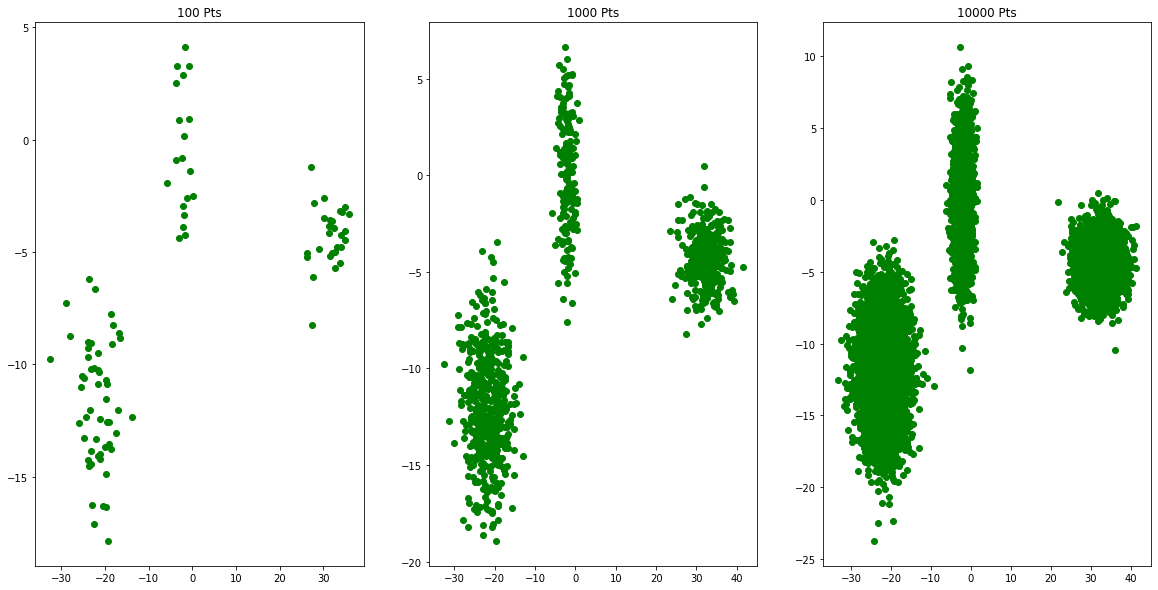

In [29]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.plot(data_train['A'].head(100), data_train['B'].head(100), "go")
plt.title("100 Pts")

plt.subplot(1,3,2)
plt.plot(data_train['A'].head(1000), data_train['B'].head(1000), "go")
plt.title("1000 Pts")

plt.subplot(1,3,3)
plt.plot(data_train['A'].head(10000), data_train['B'].head(10000), "go")
plt.title("10000 Pts")
plt.show()

I was surprised by how these two features showed 3 distinct clusters and decided to plot each feature with the others to see if this discovery maintained consistent. I won't go through all the features here since it takes too much space, but I did provided an additional file with the plots. So for this official report, I'll only showcase a few of the plots by skipping a few.

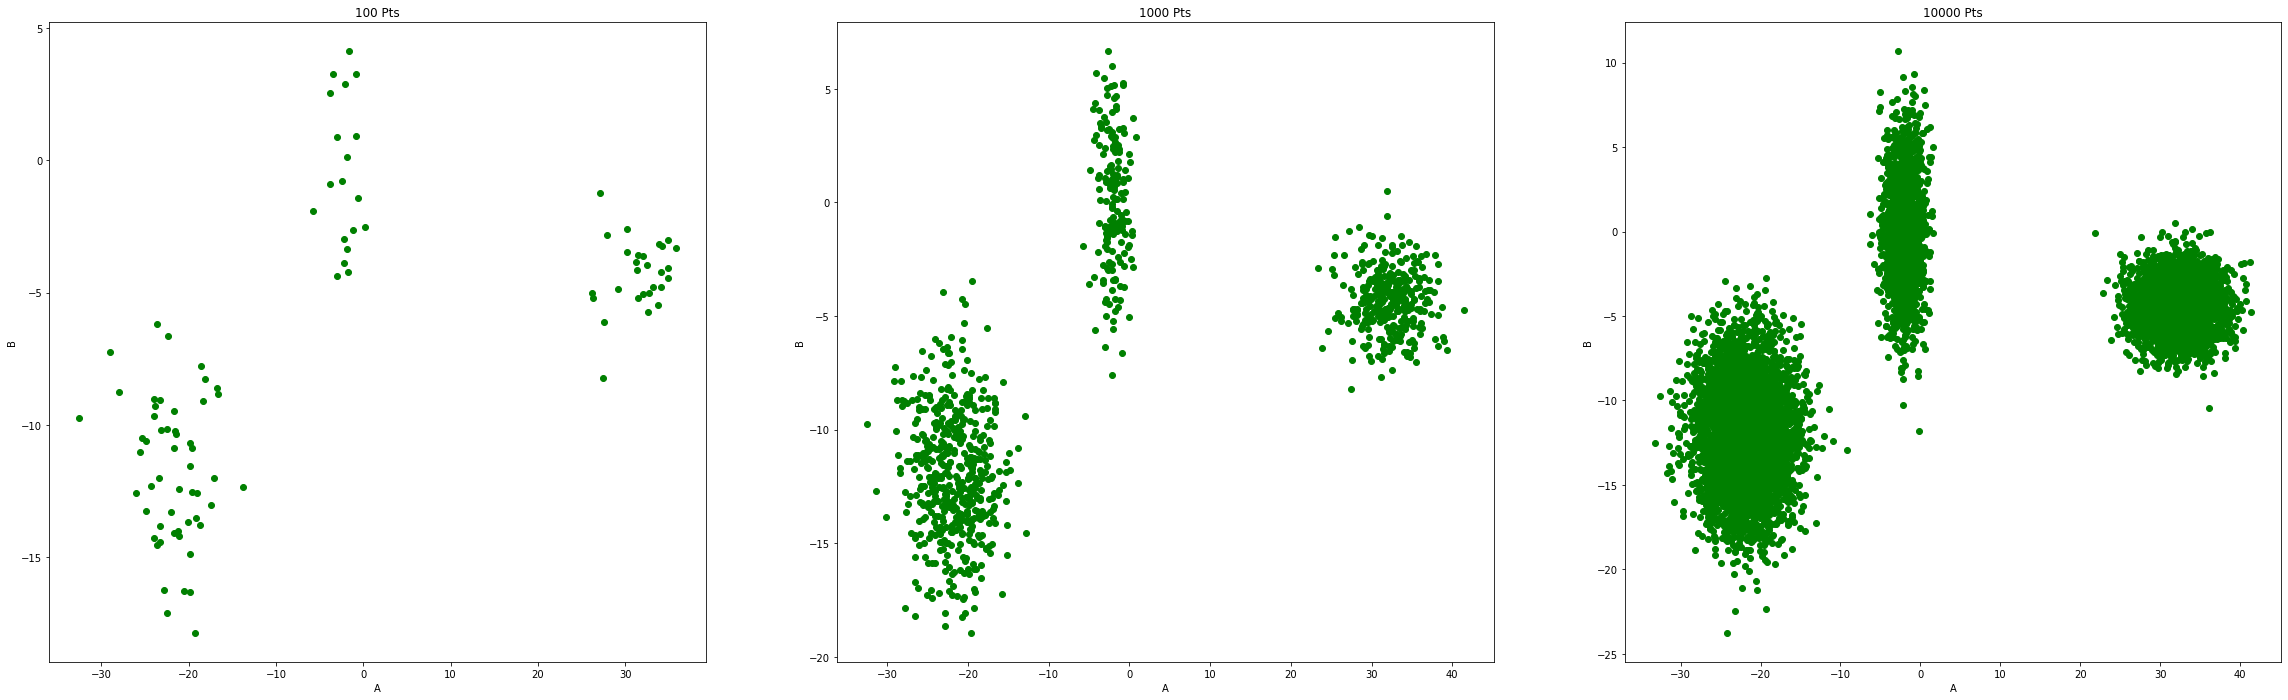

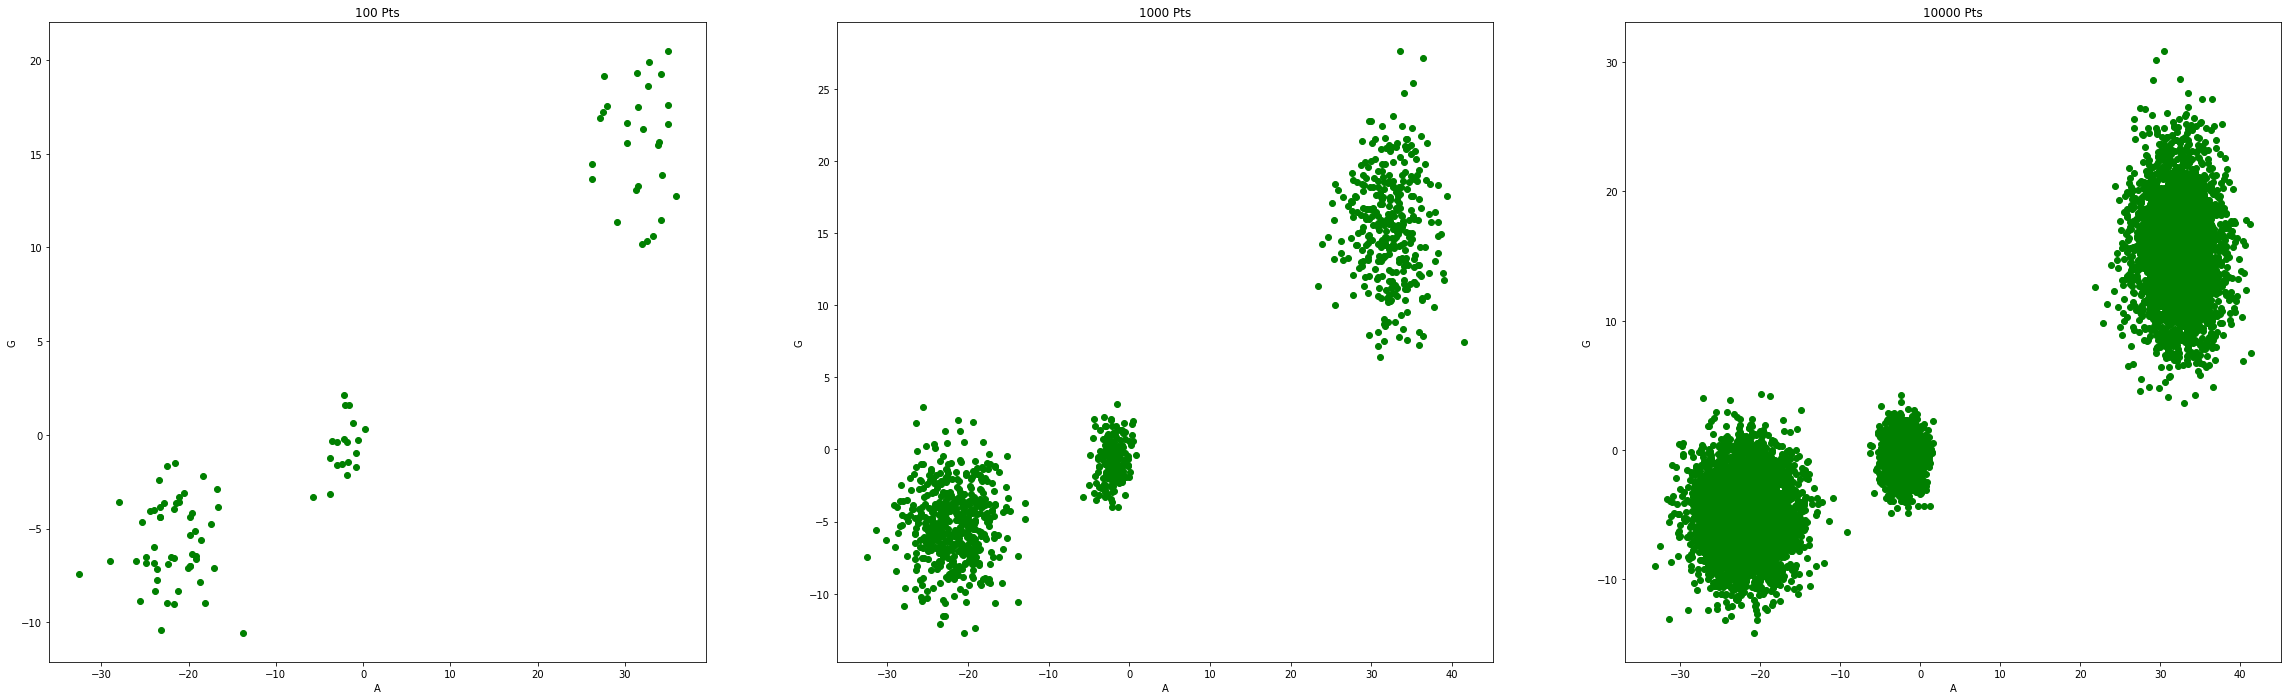

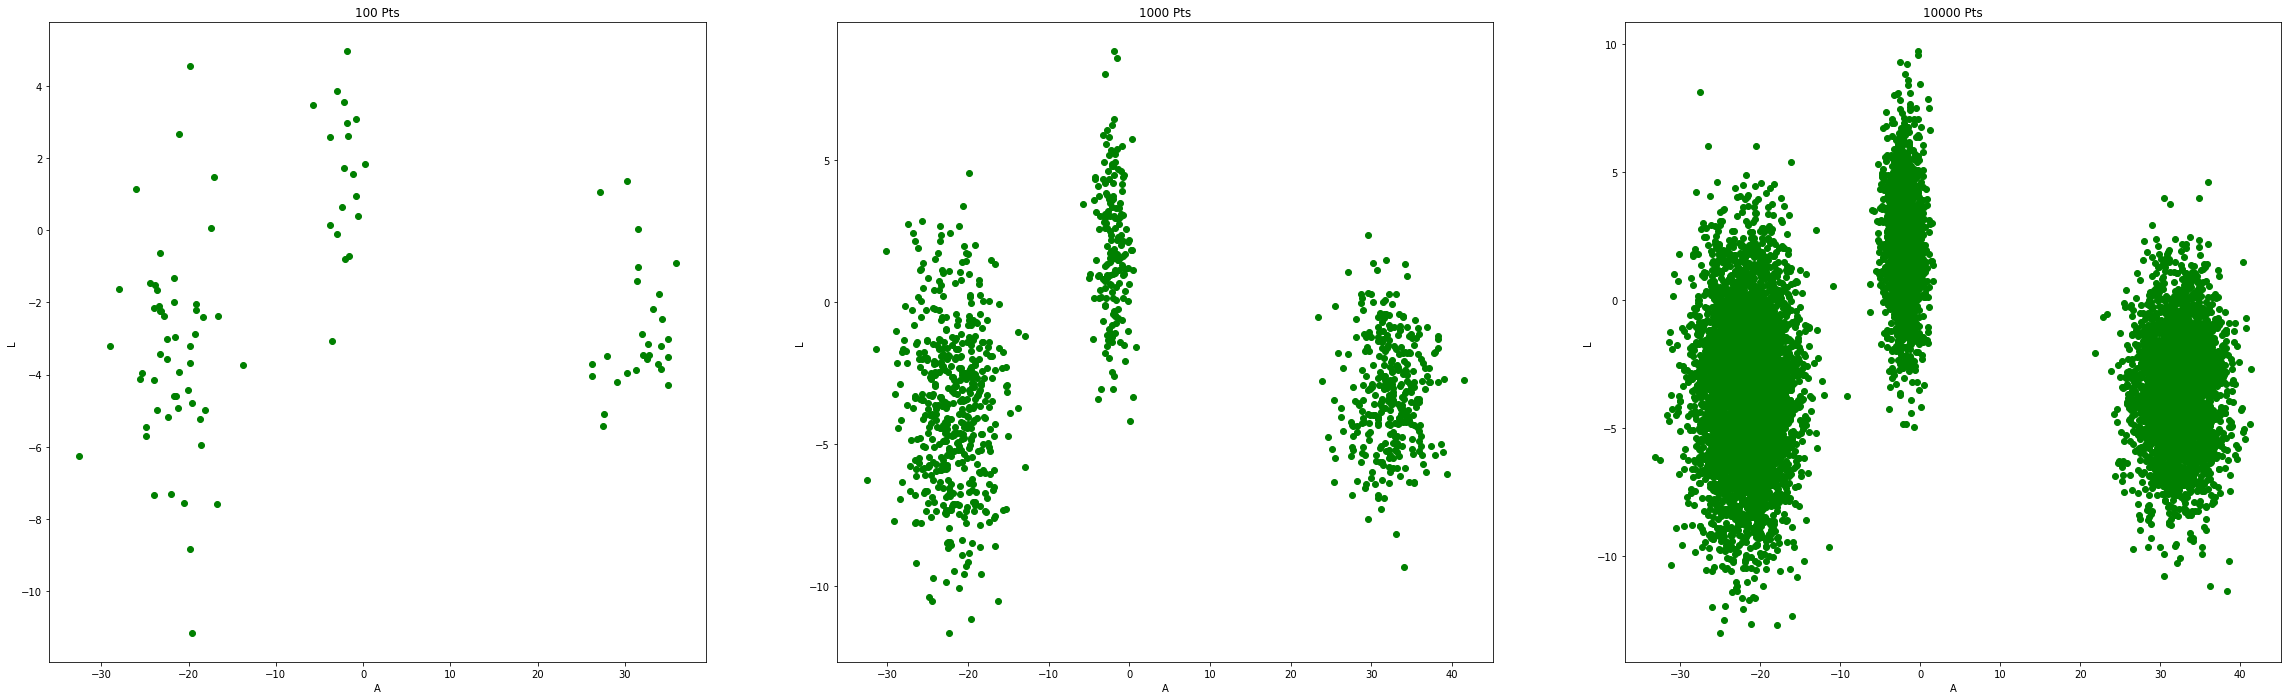

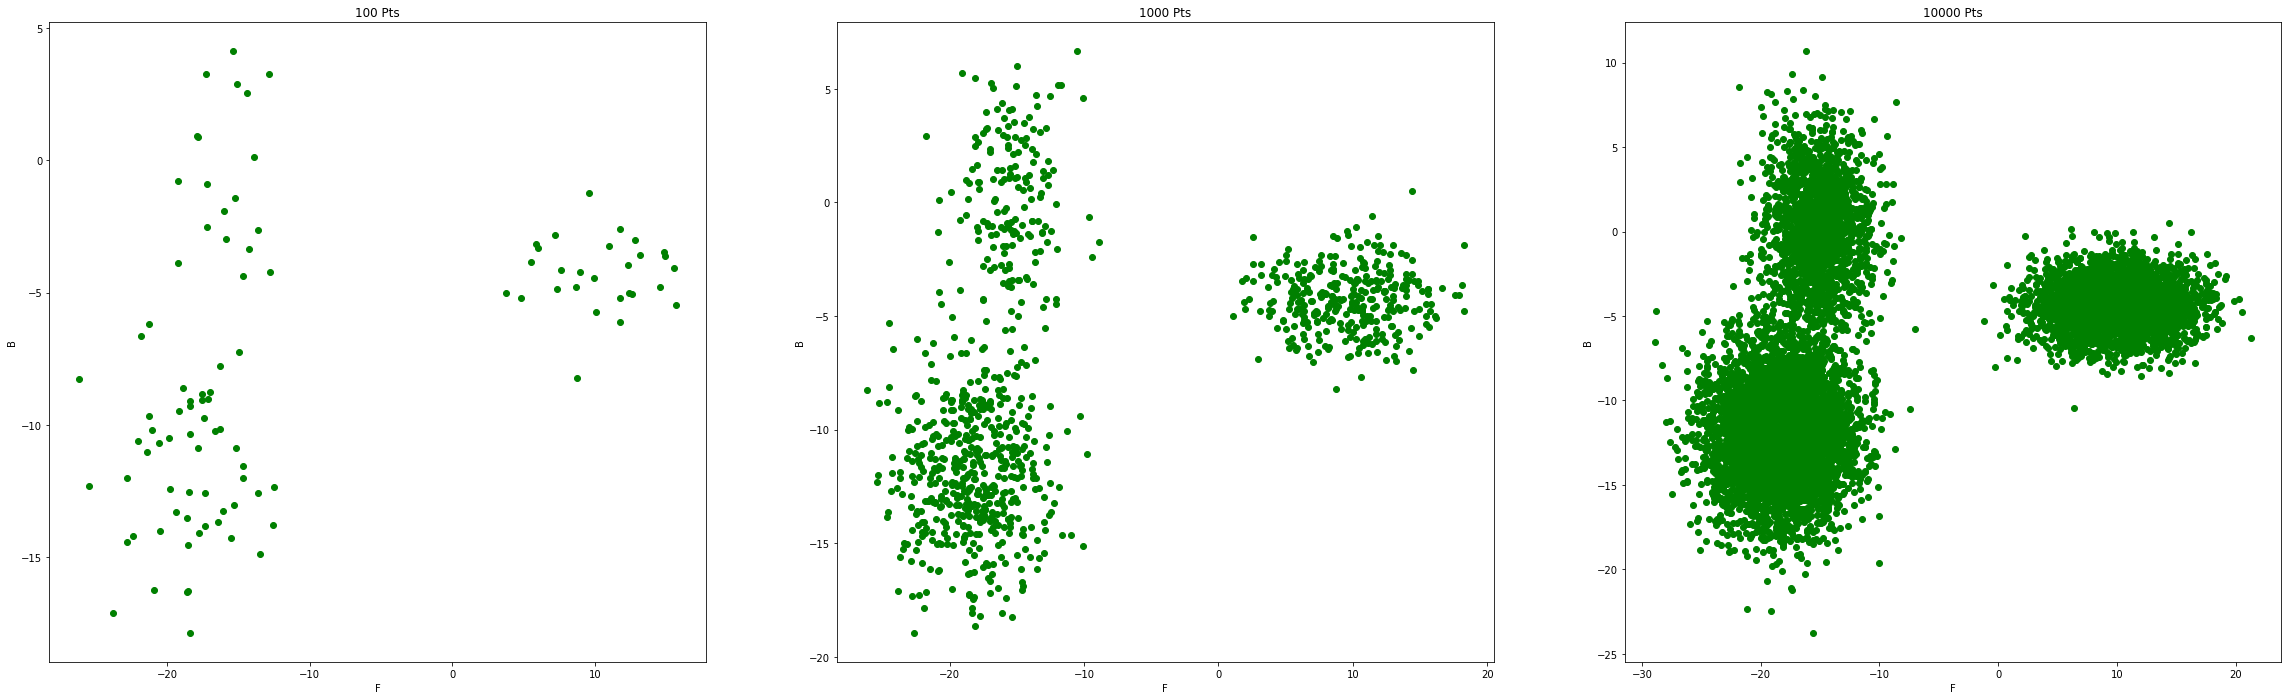

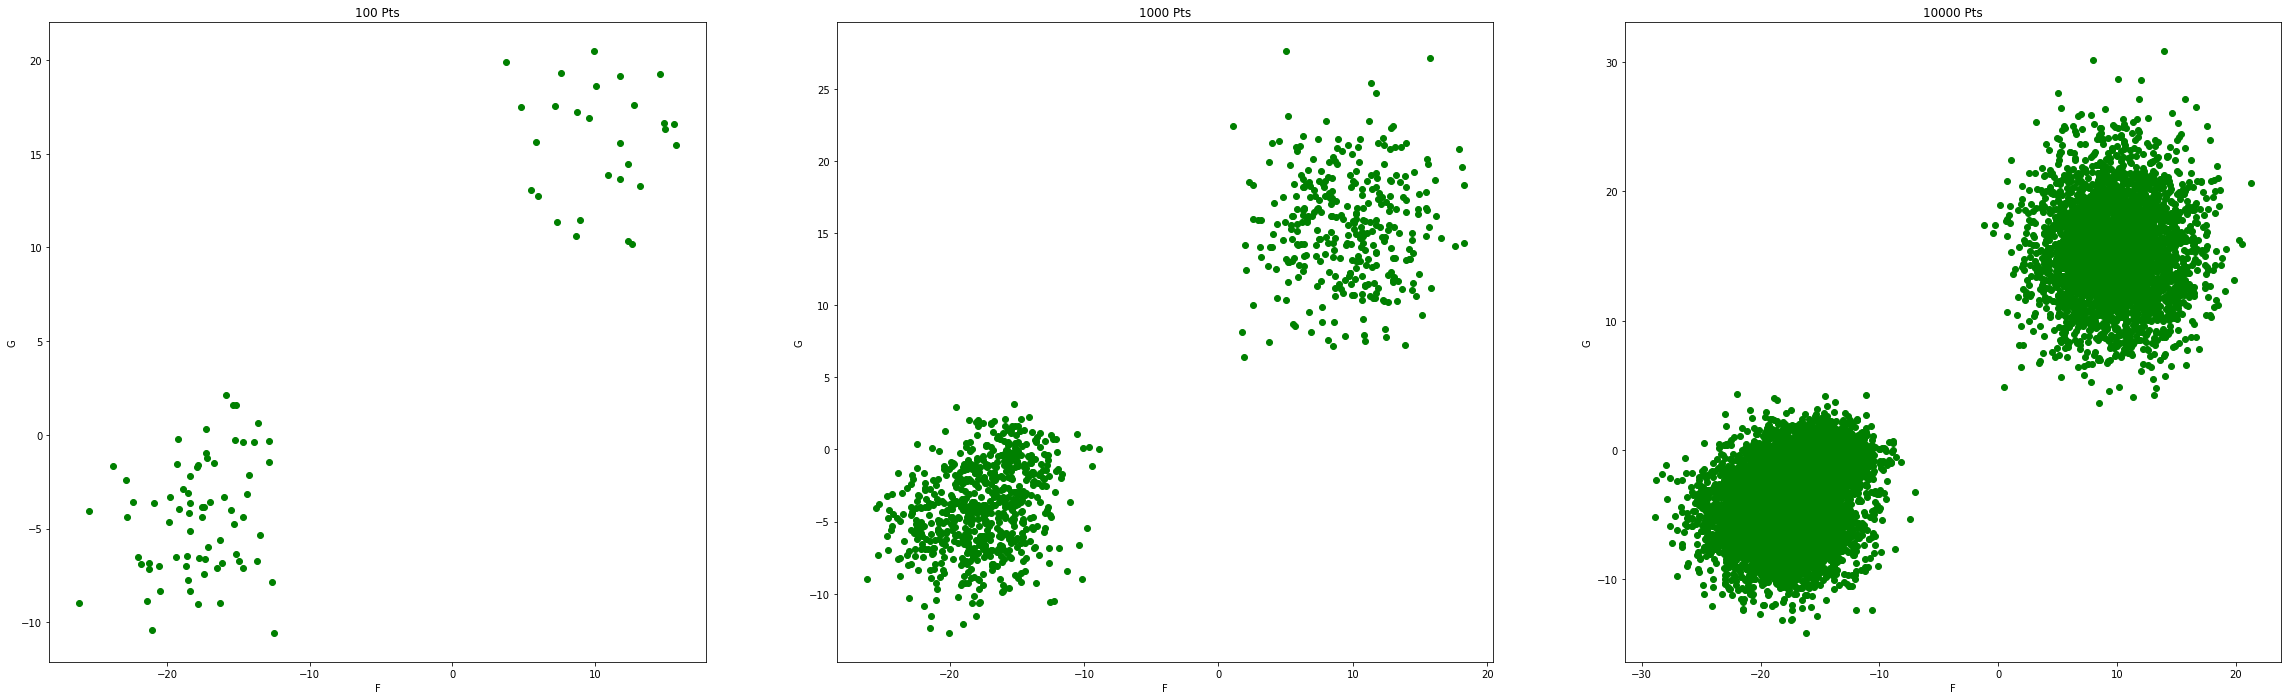

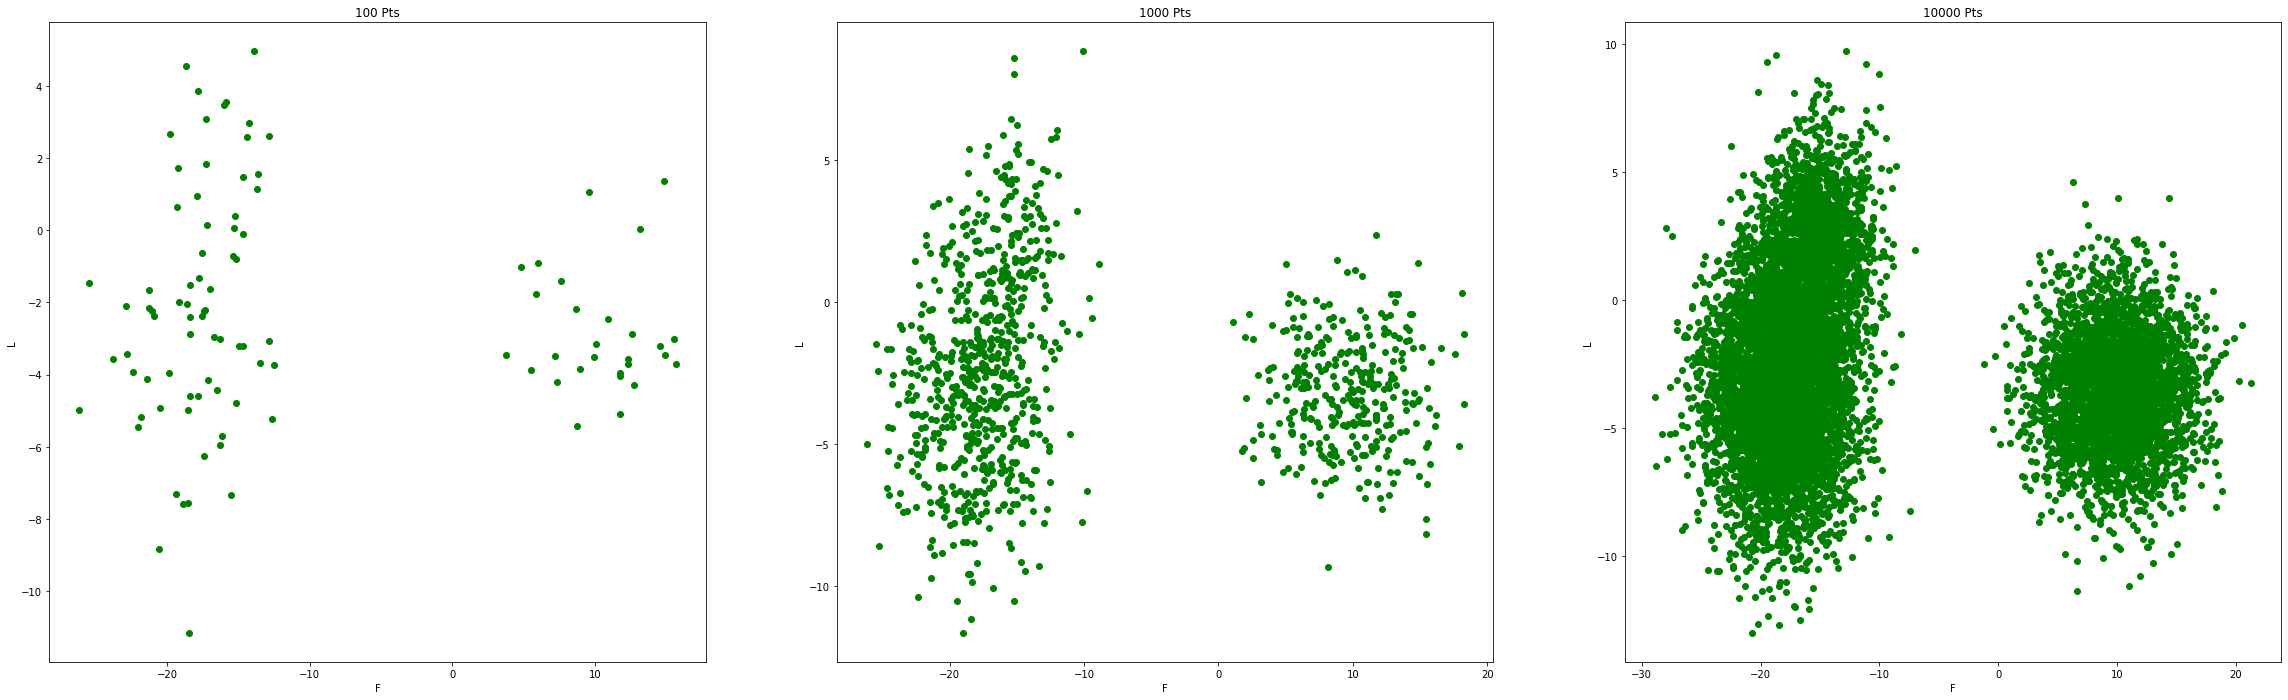

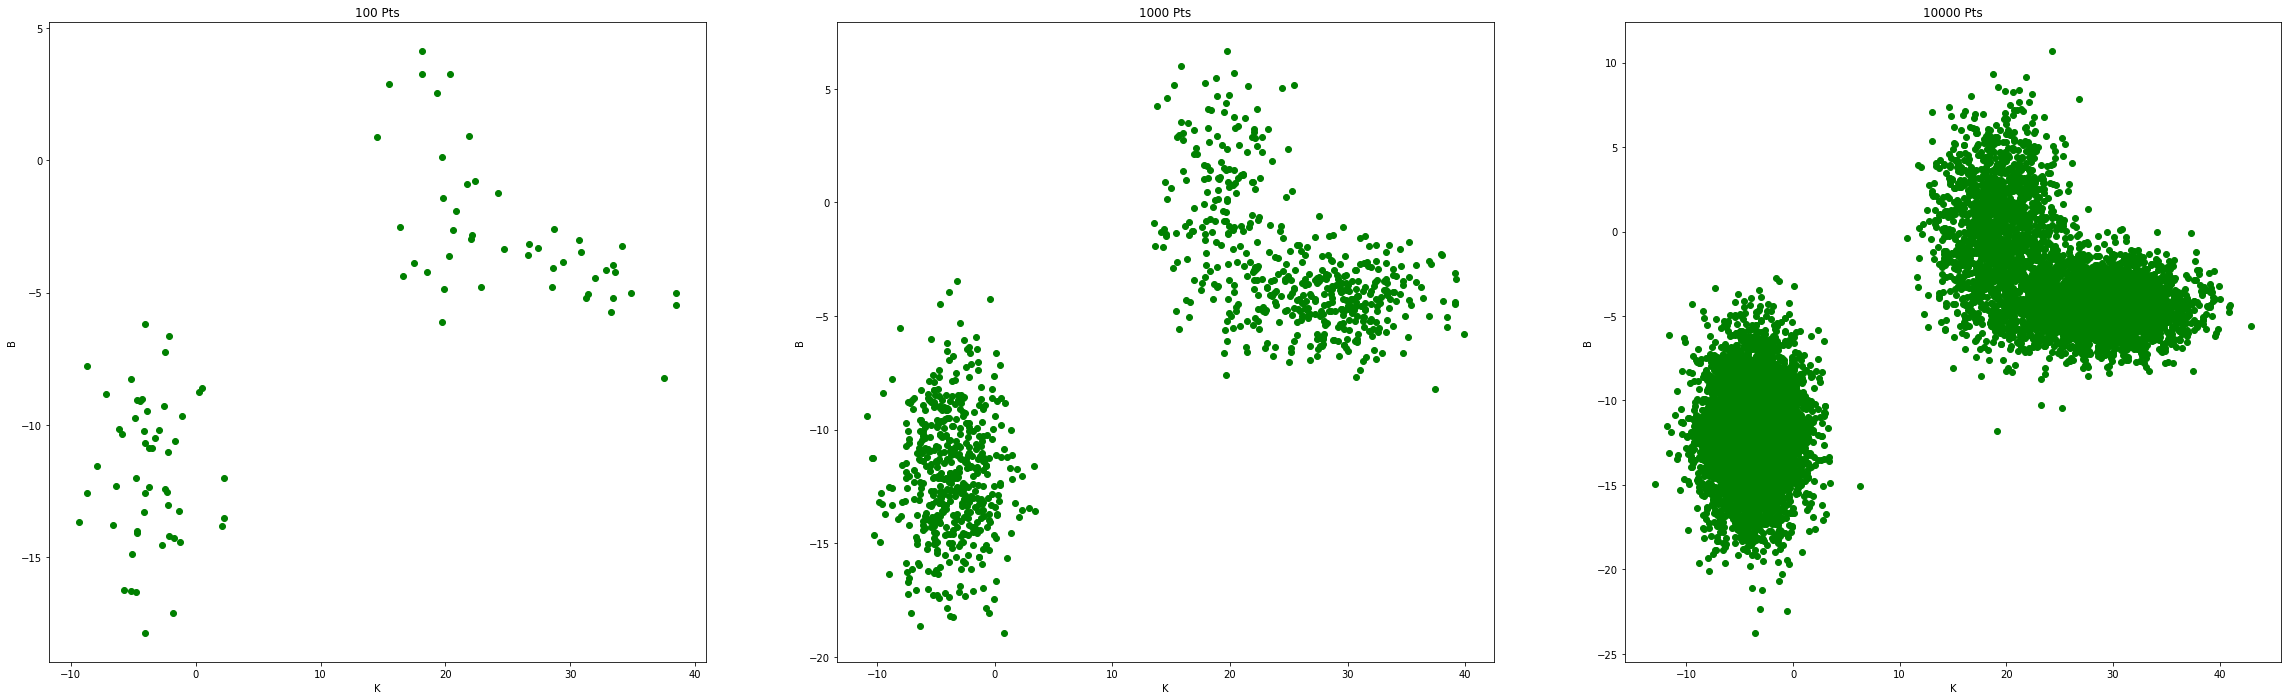

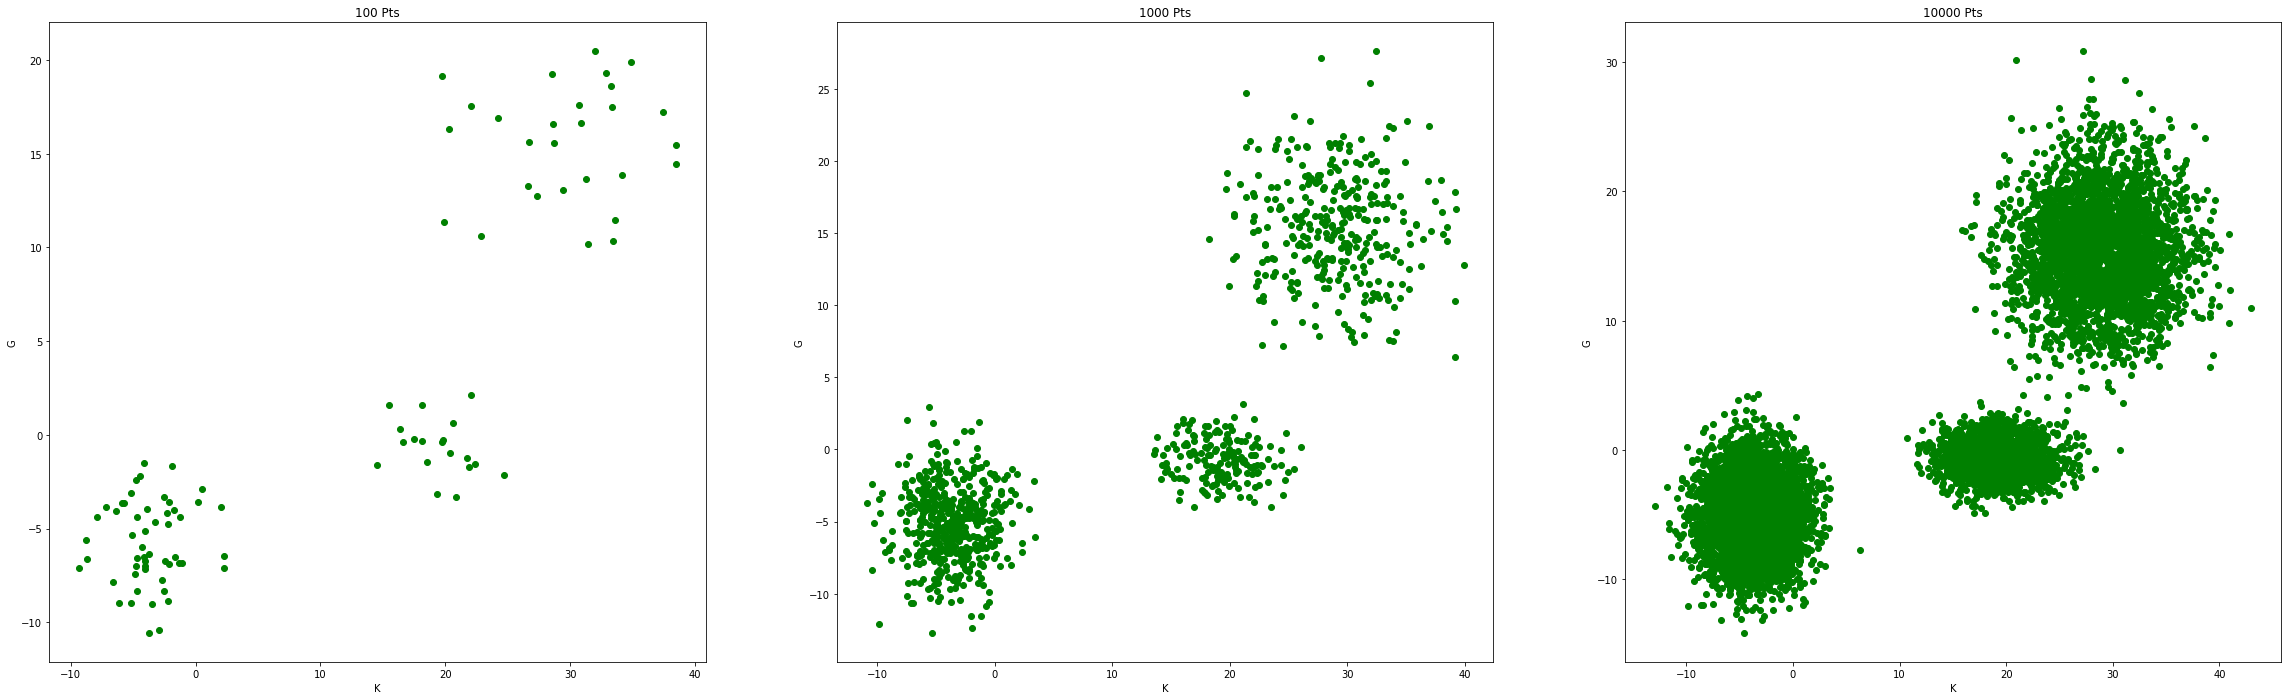

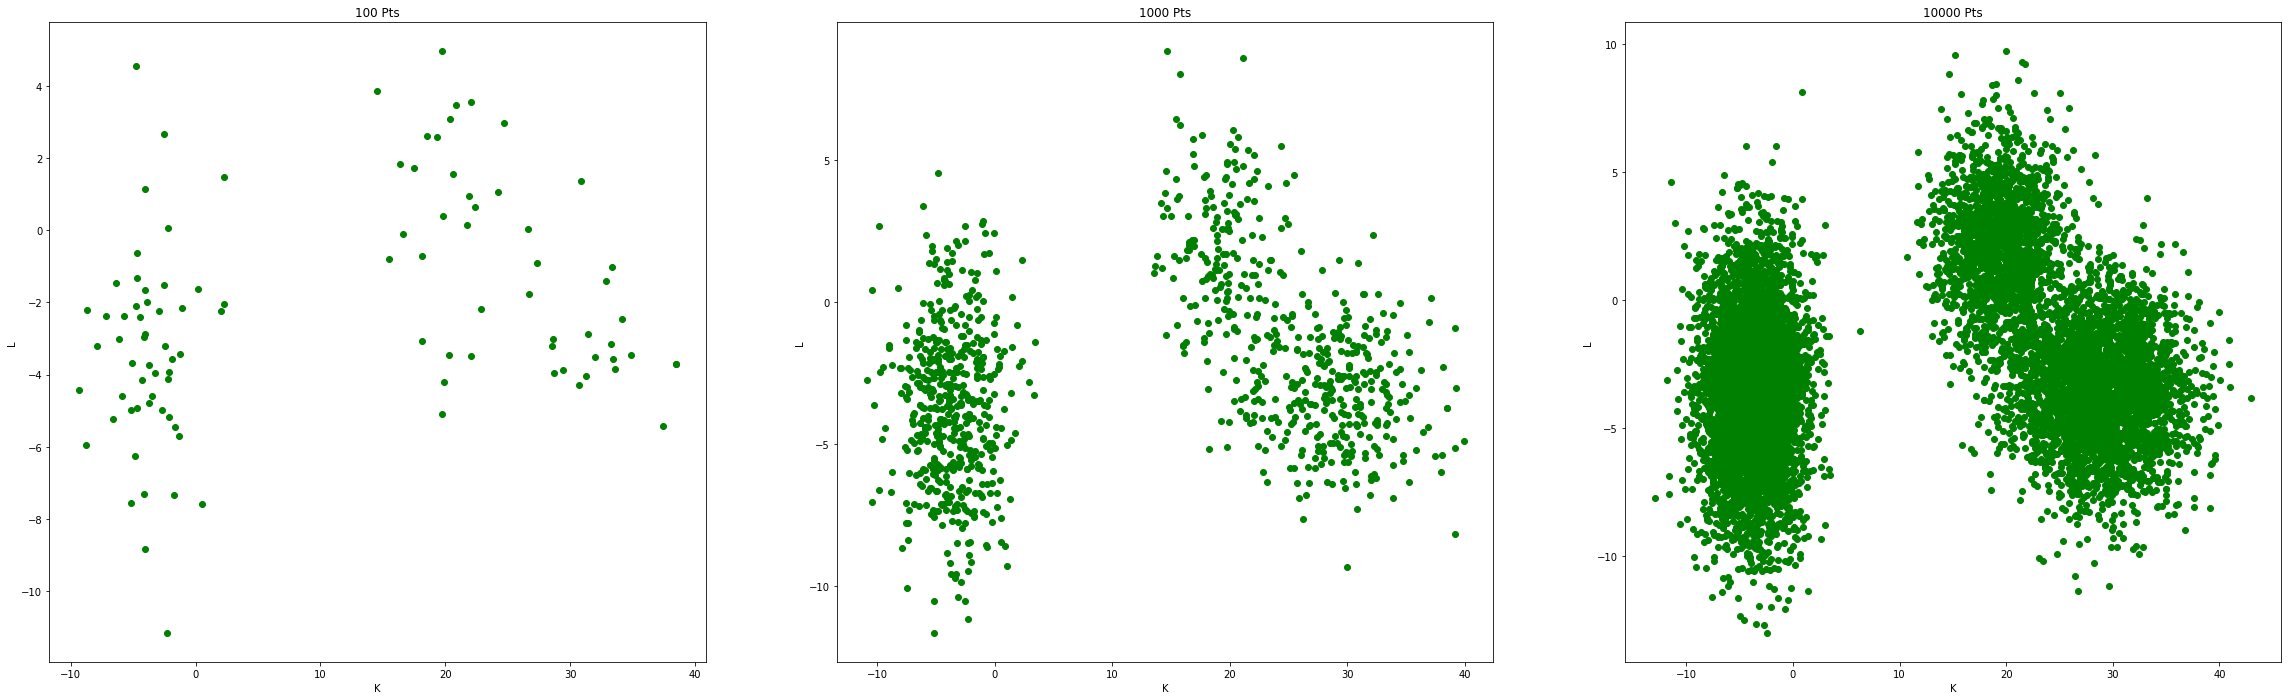

In [30]:
features = data_train.columns[:-1]

for i in range(0, len(features), 5):
    for j in range(1, len(features), 5):
        if i != j:
            plt.figure(figsize=(40, 40))
            plt.subplot(3,3,1)
            plt.plot(data_train[features[i]].head(100), data_train[features[j]].head(100), "go")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title("100 Pts")

            plt.subplot(3,3,2)
            plt.plot(data_train[features[i]].head(1000), data_train[features[j]].head(1000), "go")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title("1000 Pts")
            
            plt.subplot(3,3,3)
            plt.plot(data_train[features[i]].head(10000), data_train[features[j]].head(10000), "go")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title("10000 Pts")
            plt.show()

After plotting all the features against each other, I found out that there was some consistency with clustering. Majority of the features would show clusters of three, but there were a few features that would only produce two clusters. After examining these plots, I also noticed that the same features would cause these distortions that deviated from forming three clusters. The feature 'L' & 'B' specifically, would either create only two clusters or form just one cluster. I'm not quite sure what this could indicate or what I can do with this information, but it is worth noting.

But by analyzing these plots, I decided to try out cluster analysis. Before I do this, however, I thought it best to perform a a PCA to remove some of these features and condense the data. Handling 15 features is really challenging. 

But first, I need to scale the data. By following the guide shown in this link: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60, I was able to accomplish this.

In [13]:
# Scale the data & create a df from it
scaler = StandardScaler()
X_train_values = X_train.values
X_train_scaled = scaler.fit_transform(X_train_values)
df_scaled = pd.DataFrame(X_train_scaled, columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'])
df_scaled.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,-0.705946,-0.727654,-0.809002,1.030200,-0.897121,-0.633427,-0.571403,-1.004366,-0.992190,0.104853,-0.997748,-2.139430,-1.149272,-0.629874,-1.120282
1,1.360370,0.430663,1.334581,-0.613811,1.390930,0.957360,1.243693,1.558836,0.911236,0.863865,1.335837,-0.244874,0.565704,1.066981,0.726891
2,-0.789735,-0.365444,-0.474368,1.106226,-1.151263,-0.994855,-0.820983,-0.823763,-0.985012,0.005674,-0.798199,0.412683,-1.004782,-0.929556,-0.908852
3,1.406593,0.509518,1.119844,-0.532543,1.146859,1.326494,1.270793,1.162312,0.521607,1.299689,1.324194,0.826479,0.762518,1.052775,1.011038
4,1.368131,0.419343,1.536061,-0.280084,1.452523,1.390090,0.759096,1.525827,0.647941,1.253366,1.073693,-1.164246,0.936954,1.185082,1.044845


Since I do not know the most optimal number of components for this data (my guess is 3 from the clusters produced above), it is best to find out throught the available functionality of PCA. The PCA that is create prioritizes finding the optimal # of components to ensure that 95% of the variance is captured from the original data.

In [14]:
# Create pca with 95% variance
pca = PCA(0.95)
pca.fit_transform(df_scaled)

print("The optimal number of components to maintain 95% variance:")
print(pca.n_components_)

The optimal number of components to maintain 95% variance:
3


In [15]:
print("The explained variance ratio:")
print(pca.explained_variance_ratio_)

The explained variance ratio:
[0.72354161 0.20137715 0.0328774 ]


Now that I was sure about the optimal number of components (3), I needed to find the features that correlated with the number of components, which is flashback to our first homework assignment. This also provides me with the opportunity to do some feature selection through variance. From https://elitedatascience.com/dimensionality-reduction-algorithms#feature-selection, if the variance is small, meaning that values are not changing, then they generally do not contribute as much to the data. 

However, it was at this point that I discovered that PCA did not fall under feature selection, which indicated that even if I performed PCA on this dataset, the model that I produce could be overfit. So I thought it was best to return to the original features and see if I can find any correlation between them. 

I thought using the provided function by pandas was enough (df.corr()), but thanks to this fellow programmer, I was able to showcase the top features with the highest correlation. Here is the link to the source code: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [31]:
print("Correlation Matrix")
print(X_train.corr('pearson'))

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 10))

Correlation Matrix
          A         B         C         D         E         F         G  \
A  1.000000  0.615548  0.936634 -0.600179  0.948101  0.947082  0.942632   
B  0.615548  1.000000  0.415180 -0.858711  0.767007  0.460580  0.510753   
C  0.936634  0.415180  1.000000 -0.373441  0.828049  0.950687  0.925007   
D -0.600179 -0.858711 -0.373441  1.000000 -0.780575 -0.424752 -0.483618   
E  0.948101  0.767007  0.828049 -0.780575  1.000000  0.854437  0.872560   
F  0.947082  0.460580  0.950687 -0.424752  0.854437  1.000000  0.927823   
G  0.942632  0.510753  0.925007 -0.483618  0.872560  0.927823  1.000000   
H  0.969398  0.721639  0.871911 -0.725558  0.980159  0.893118  0.903660   
I  0.682772  0.882238  0.463040 -0.945224  0.848049  0.512732  0.567594   
J  0.476973 -0.225111  0.663282  0.316794  0.237623  0.619682  0.551364   
K  0.937914  0.756810  0.819920 -0.769963  0.973023  0.845982  0.863587   
L -0.018618  0.411432 -0.188375 -0.479590  0.160389 -0.149281 -0.095621   
M  0.8

## Model Training & Validation?

I kind of introduce model validation here, but then go back to data processing, hence the question mark.

Anyway, mow that I know which features have the highest correlation, I can begin doing some actual feature selection and testing them through a pipeling to ensure that the model is not overfit. Since I mentioned that I would be using clustering, I was fortunate to find a method from cambridgespark that will find the optimal K for KMeans clustering. It's best to test this as a just-in-case, but I have a very good hunch that the optimal number will also be 3. Here is the link: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [32]:
# Apparently, performing this on the original data is very draining.
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

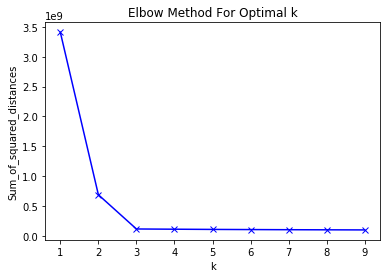

In [33]:
# A plot to display what the optimal K will be
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the Elbow method in the plot, we can see that 3 is the optimal k. Now I can utilize this within the pipeline. The pipeline will then be used to predict on the X_test df.

In [62]:
pipeline = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train.columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('pca',
     PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
pipeline.fit(X_train, y_train)
results = pipeline.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Homogeneity_score: 1.0


From the above, we can see that by just running the data training into the pipeline with just PCA and KMeans will result in a overfitting model. This is confirmed when I check the homegeneity_score between the class col & the prediction. 

Well, now that I know that KMeans works well within the pipeline, I can go back to removing the high correlating features. As I recall, the highest correlating features are these pairs: (E,H), (M,O), & (E,K). 

Because of this, I'm going to try removing these features one at a time and then test them through a pipeline to see if there is an decrease in the homogeneity score. 

In [63]:
# Dropping the following pairs:
# to_drop = [['E', 'H']
# to_keep = ['A', 'B', 'C', 'D', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

to_keep = X_train.columns.drop(['E', 'H']).values
pipeline1 = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train[to_keep].columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('pca',
     PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
pipeline1.fit(X_train, y_train)
results = pipeline1.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Homogeneity_score: 1.0


I was very surprised to see that the homegenity score remained the same after removing the highest pair of correlating features. Because removing one pair did not make much of a difference, I thought it would be best to also remove the second highest pair & test the pipeline again.

In [64]:
# Dropping the following pairs:
# to_drop = [['E', 'H'], ['M', 'O']
# to_keep = ['A', 'B', 'C', 'D', 'F', 'G', 'I', 'J', 'K', 'L', 'N']

to_keep = X_train.columns.drop(['E', 'H', 'M', 'O']).values
pipeline2 = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train[to_keep].columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('pca',
     PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
pipeline2.fit(X_train, y_train)
results = pipeline2.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Homogeneity_score: 1.0


It still did not reduce the homogeneity_score, so I'll also remove the third pair. But since the third pair consist of a feature previously removed, I guess I'll just be removing 'K'.

In [65]:
# Dropping the following pairs:
# to_drop = [['E', 'H'], ['M', 'O'], ['E', 'K']
# to_keep = ['A', 'B', 'C', 'D', 'F', 'G', 'I', 'J', 'L', 'N']

to_keep = X_train.columns.drop(['E', 'H', 'M', 'O', 'K']).values
pipeline3 = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train[to_keep].columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('pca',
     PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
pipeline3.fit(X_train, y_train)
results = pipeline3.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Homogeneity_score: 1.0


Since I'm not reducing the homogeneity_score at all, I've decided to jump to removing the first 10 high correlated pairs of features from the list above. I've already removed the first three. It's time to go extreme. Since most of these pairs are repeated features, it seems in summary that I will actually just be removing the following features: E, H, M, O, K, A, N, I, C & F.

In [70]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 10))

Top Absolute Correlations
E  H    0.980159
M  O    0.975470
E  K    0.973023
A  H    0.969398
H  K    0.969105
N  O    0.962598
M  N    0.959350
E  N    0.959121
I  M    0.956823
C  F    0.950687
dtype: float64


In [71]:
to_keep = X_train.columns.drop(['E', 'H', 'M', 'O', 'K', 'A', 'N', 'I', 'C', 'F']).values
pipeline4 = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train[to_keep].columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('pca',
     PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
pipeline4.fit(X_train, y_train)
results = pipeline4.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Homogeneity_score: 1.0


Now I'm more concerned that I'm doing something wrong with the pipeline. I've already removed 10 features and the homogeneity_score still hasn't been reduced. Maybe I didn't actually go to far? Since the PCA showed that three features were enough to capture the variability of the original data, I'm going to remove the 12 features.

In [78]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 30))

Top Absolute Correlations
E  H    0.980159
M  O    0.975470
E  K    0.973023
A  H    0.969398
H  K    0.969105
N  O    0.962598
M  N    0.959350
E  N    0.959121
I  M    0.956823
C  F    0.950687
A  E    0.948101
K  N    0.947472
A  F    0.947082
D  I    0.945224
I  O    0.943269
A  G    0.942632
E  O    0.942294
H  N    0.939458
A  K    0.937914
   C    0.936634
E  M    0.930816
K  O    0.930663
F  G    0.927823
C  G    0.925007
K  M    0.919103
D  M    0.913398
H  O    0.913338
I  N    0.907872
G  H    0.903660
H  M    0.897426
dtype: float64


In [80]:
to_keep = X_train.columns.drop(['E', 'H', 'M', 'O', 'K', 'A', 'N', 'I', 'C', 'F', 'D', 'G']).values
pipeline5 = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train[to_keep].columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('pca',
     PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
pipeline5.fit(X_train, y_train)
results = pipeline5.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Homogeneity_score: 1.0


In [136]:
to_keep = X_train.columns.drop(['E', 'H', 'M', 'O', 'K', 'A', 'N', 'I', 'C', 'F', 'D', 'G']).values
pipeline6 = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train[to_keep].columns.values,
          [ContinuousDomain(),
           StandardScaler()])])),
    ('cluster', KMeans(n_clusters=3))
])
pipeline6.fit(X_train, y_train)
results = pipeline6.predict(X_test)
actual = np.concatenate(y_test.values)
print("Homogeneity_score:", metrics.homogeneity_score(actual, results))

Homogeneity_score: 1.0


At this point, I'm not really sure what else I can do to not overfit the model. I know there must be more to the data pre-processing stage that I can do but I'm not so sure I'm capable of completeing and understanding it. Since there is nothing more than I can really do, I'll just call it quits for now. Maybe some day I'll be angry enough at myself that I'll proceed to torture myself even more to accomplish my original goal of this project.

## Final Model/Validation

In [129]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,31.628960,-4.925617,29.828238,-5.572780,20.129709,7.072373,19.335662,27.283873,9.375416,15.336531,34.086952,-3.845316,-4.195369,18.972837,21.279968,3
1,-24.878420,-12.140354,-0.638120,6.712182,-18.044057,-12.485812,-5.060765,-23.392410,-9.336210,6.583095,-2.530664,-3.626419,-35.546821,-11.784902,-4.100635,2
2,-25.711262,-16.540789,7.450853,4.941910,-18.273375,-13.062138,-7.082651,-17.443779,-8.103270,8.345905,-1.319908,-1.234682,-33.845745,-6.827543,-5.758754,2
3,27.837458,-2.436980,29.479857,-3.360867,14.997228,10.254915,10.530714,27.082219,9.254091,26.860616,29.592860,-2.926678,-4.497271,15.949510,19.642792,3
4,30.520663,-5.017300,24.798154,-4.668743,19.697230,12.570798,13.141632,31.598069,12.120745,16.478925,25.257392,-2.133821,-4.365376,21.024188,18.976706,3


In [104]:
pipeline6.fit(X, y)

PMMLPipeline(steps=[('mapper', DataFrameMapper(default=False, df_out=False,
                features=[(array(['B', 'J', 'L'], dtype=object),
                           [ContinuousDomain(dtype=None, high_value=None,
                                             invalid_value_replacement=None,
                                             invalid_value_treatment='return_invalid',
                                             low_value=None,
                                             missing_value_replacement=None,
                                             missing_value_treatment='as_is',
                                             missing_values=None,
                                             outlier_treatment='as_is',
                                             with_data=True,
                                             with_statistics=True),
                            StandardScaler(copy=True, with_mean=True,
                                           with_std=True)])],
      

In [102]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

input_types = dict([(x, FloatTensorType([None, 1])) for x in df.columns.values])

model_onnx = convert_sklearn(pipeline6, 'pipeline_project_onnx', initial_types=list(input_types.items()))
   
with open("projectpipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

MissingShapeCalculator: Unable to find a shape calculator for type '<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library (ie: onnxmltools), you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.


In [105]:
# Create final pipeline that doesn't include DataFrameMapper...
finalPipeline = PMMLPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('cluster', KMeans(n_clusters=3))
])
final_pipeline.fit(df, df['Class'])

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Pipeline(memory=None,
         steps=[('column_selector',
                 ColumnSelector(cols=['B', 'J', 'L'], drop_axis=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('cluster',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [107]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

input_types = dict([(x, FloatTensorType([None, 1])) for x in df.columns.values])

model_onnx = convert_sklearn(finalPipeline, 'pipeline_project_onnx', initial_types=list(input_types.items()))
   
with open("projectpipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

AttributeError: 'PCA' object has no attribute 'n_components_'

In [133]:
# Another attempt, but I guess I'll do pca before hand
scaler = StandardScaler()
df_values = df.drop(['E', 'H', 'M', 'O', 'K', 'A', 'N', 'I', 'C', 'F', 'D', 'G', 'Class'], axis=1).values
scaled = scaler.fit_transform(df_values)
df_scaled = pd.DataFrame(scaled, columns = ['B','J','L'])

pca_ds = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_ds, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,-0.482524,-0.882670,0.022635
1,-0.554799,0.768167,-0.063692
2,-0.600938,1.401382,0.855717
3,-0.799050,-1.956385,0.821181
4,-0.224123,-0.884149,0.495964


In [140]:
# Create final pipeline that doesn't include DataFrameMapper...
finalPipeline2 = PMMLPipeline([
    ('cluster', KMeans(n_clusters=3))
])
finalPipeline2.fit(pca_df, df['Class'])

C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PMMLPipeline(steps=[('cluster', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0))])

In [142]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

input_types = dict([(x, FloatTensorType([None, 1])) for x in pca_df.columns.values])

model_onnx = convert_sklearn(finalPipeline2, 'pipeline_project_onnx', initial_types=list(input_types.items()))
   
with open("projectpipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

RuntimeError: Only one input vector is allowed for KMeans.

## Conclusion
I tried to create an onnx file, but it kept popping error after error, so the best I can do is turn in this .ipynb. Anyway, for this project, I thought I had a solid plan for the data pre-processing section, but it seems like what I did was not enough. Even after removing over 12 features, the I kept overfitting the model. Maybe if I had more knowledge in feature selection techniques I would have been able to properly complete my objective. I thought for sure I was on the right track with clustering since the data looked as if it was heading in that direction, but perhaps I was wrong. If I ever return to this data file, I'll for sure try using other methods, like decision tree. I guess the original sample with the decision tree was meant to guide us in that direction, but like I said, I really beleived the data was pushing for clusters.

I have to admit though, I had just a tiny bit of fun. At first, it was very confusing and scary since I didn't know where to start or what the examples files were even doing. But after doing some bit of research and looking at other examples, I really felt as if I was able to understand what was going on. Or at least to some degree. Writing out my thought process also helped. 

## References

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://elitedatascience.com/dimensionality-reduction-algorithms#feature-selection
https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f